<a href="https://www.kaggle.com/code/niramay/kmeans-clustering-wikipedia-articles?scriptVersionId=110145002" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install wikipedia

  Preparing metadata (setup.py) ... - done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=6b619425fa4615314e5b07cb8cb93e8b090a57803daea1374611d9f385e3ba20
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [2]:
import numpy as np 
import pandas as pd 
import wikipedia
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
articles = ['Field Hockey','Football','Baseball', 'Spotify', 'apple music', 'youtube music','fudge', 'ice cream','chocolate','instagram', 'social media','facebook']

In [4]:
wikis = []
titles = list(articles)

for article in articles:
    article_content = wikipedia.page(article).content
    wikis.append(article_content)

In [5]:
vectorizer = TfidfVectorizer(stop_words={'english'})
vectorized = vectorizer.fit_transform(wikis)

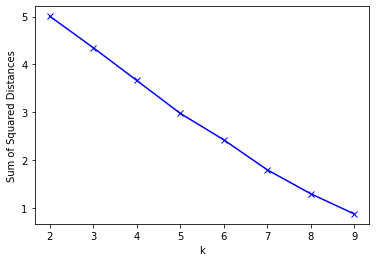

In [6]:
dSqSum = []

for k in range(2,10):
   kmeans = KMeans(n_clusters=k, max_iter=200, n_init=10)
   kmmeans = kmeans.fit(vectorized)
   dSqSum.append(kmeans.inertia_)

plt.plot(range(2,10), dSqSum, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [7]:
optimal_k = 6
kMeansModel = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=200, n_init=10)
kMeansModel.fit(vectorized)
labels=kMeansModel.labels_
clusterDF=pd.DataFrame({"Title" : titles, "Cluster" : labels})
clusterDF = clusterDF.sort_values('Cluster')
clusterDF

,Title,Cluster
0,Field Hockey,0
1,Football,0
2,Baseball,0
6,fudge,0
3,Spotify,1
4,apple music,1
5,youtube music,1
9,instagram,2
10,social media,2
8,chocolate,3


Cluster: 0
Titles
Field Hockey
    Football
    Baseball
       fudge


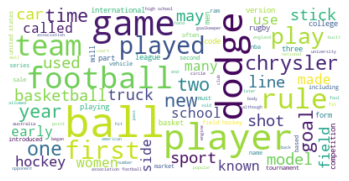

Cluster: 1
Titles
      Spotify
  apple music
youtube music


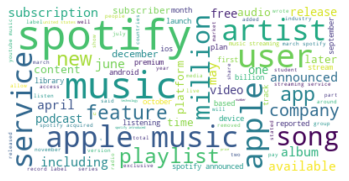

Cluster: 2
Titles
   instagram
social media


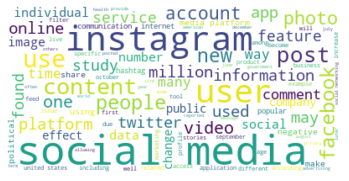

Cluster: 3
Titles
chocolate


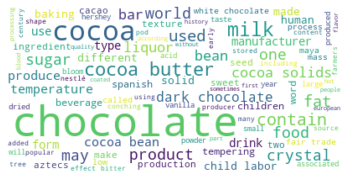

Cluster: 4
Titles
ice cream


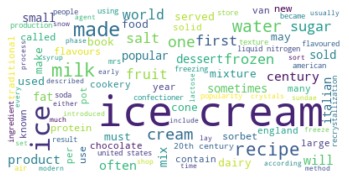

Cluster: 5
Titles
facebook


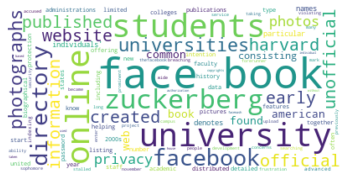

In [8]:
articles_data={'Cluster':labels,'wiki':wikis}
articles_df=pd.DataFrame(articles_data)

for k in range(0,optimal_k):
   s=articles_df[articles_df['Cluster']==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
    
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=clusterDF[clusterDF['Cluster']==k]['Title']         
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

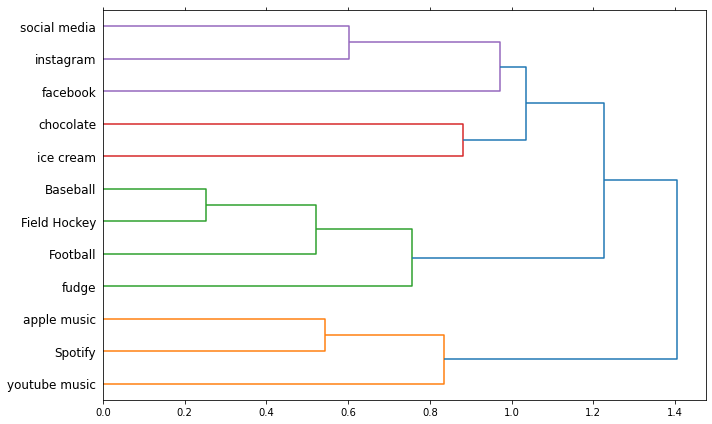

In [9]:
clustering = AgglomerativeClustering().fit(vectorized.toarray())
clustering.labels_
dist = 1 - cosine_similarity(vectorized)
linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(10, 6))
ax = dendrogram(linkage_matrix, orientation="right", labels=articles);

plt.tick_params(axis= 'x',which='both',bottom='off',top='off',labelbottom='off')
plt.tight_layout()


Apple Music, Spotify and youtube music are categorized in the same category which makes sense since all of them are music streaming apps and the wikipedia articles for all of them contain the words "artist", "music", "song", "playlist" the most frequently.

One oddity is that fudge is classified with the sports, which might be because of fudge might not common words with the other confectioneries. 

Facebook isn't clustered with Instagram and Social Media because the most frequently occuring words are "zuckerburg", "university", "online", "students". These words are not frequently occuring in the instagram and social media wikipdia articles. 

